In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
#importing the networkx library 
import networkx as nx 
from scipy.sparse import csr_matrix
import random
import numpy as np
import torch.utils.data as utils
from numpy import linalg as LA
import scipy.io
import random
seed = 666
random.seed(seed)
from sklearn.decomposition import PCA
import torch
from torch import optim
from torch.nn import functional as F

from torchvision import datasets
torch.manual_seed(seed)
from util.utils import Namespace, reset_weights
from cvae import CVAE,CVAE_NEW
from vae import VAE
from util.simulation import *


<Figure size 640x480 with 0 Axes>

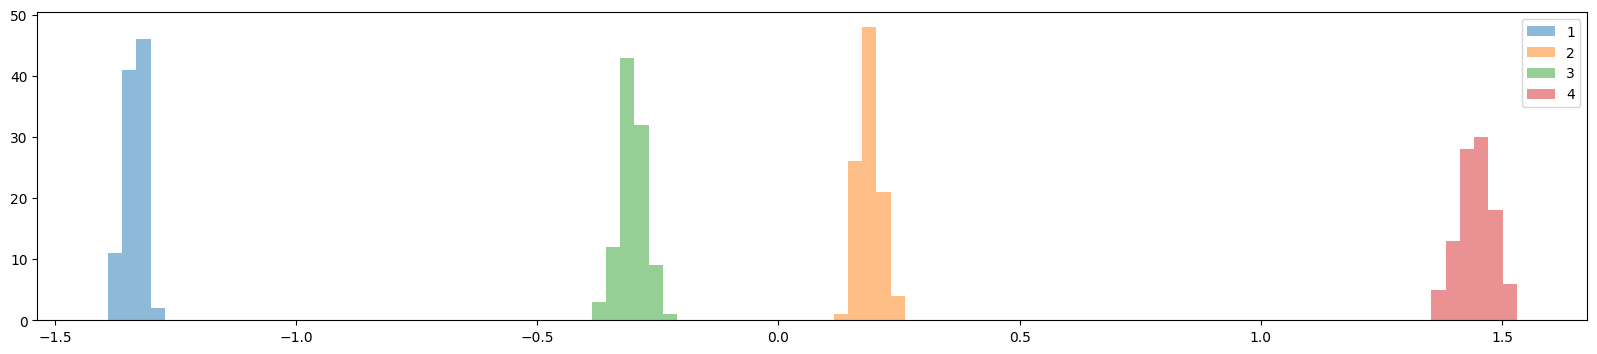

-1.3335802958481877 0.18845407946092407 -0.30182719347423775 1.4453094188152766


In [3]:

nvex = 68
random.seed(123456)


net_data = []
response = []
nrep = 125
A_erdos = np.zeros([nvex,nvex])
A_small = np.zeros([nvex,nvex])
A_commu = np.zeros([nvex,nvex])
A_scale = np.zeros([nvex,nvex])
for i in range(nrep):
    ##Erdos network
    G = nx.gnm_random_graph(nvex,400, seed=123) 
    A = nx.adjacency_matrix(G)
    A = csr_matrix.todense(A)
    A_erdos = A_erdos + A
    net_data.append(A.reshape(nvex,nvex))
    # response.append(np..ndarry.item(np.matmul(np.matmul(alpha.reshape(1,68), A), alpha)))
    ##Small world network
    G = nx.watts_strogatz_graph(nvex, 10, 0.5)
    A = nx.adjacency_matrix(G)
    A = csr_matrix.todense(A)
    A_small = A_small + A
    net_data.append(A.reshape(nvex,nvex))
    # response.append(np..ndarry.item(np.matmul(np.matmul(alpha.reshape(1,68), A), alpha)))
    ##Random Community network
    G = nx.random_partition_graph([34, 34], .25,.01)
    A = nx.adjacency_matrix(G)
    A = csr_matrix.todense(A)
    A_commu = A_commu + A
    net_data.append(A.reshape(nvex, nvex))
    # response.append(np..ndarry.item(np.matmul(np.matmul(alpha.reshape(1,68), A), alpha)))
    ##Scale free network
    G = nx.barabasi_albert_graph(nvex, 5)
    A = nx.adjacency_matrix(G)
    A = csr_matrix.todense(A)
    A_scale = A_scale + A
    net_data.append(A.reshape(nvex,nvex))
    # response.append(np..ndarry.item(np.matmul(np.matmul(alpha.reshape(1,68), A), alpha)))



alpha = np.zeros(68)
alpha[0:17]=1

net_data = []
response = []
for i in range(nrep):
    A = np.random.poisson(A_erdos, A.shape)
    # A = np.matmul(A,A)
    net_data.append(A.reshape(nvex,nvex))
    response.append(np.ndarray.item(np.matmul(np.matmul(alpha.reshape(1,68), A), alpha)))
    A = np.random.poisson(A_small, A.shape)
    # A = np.matmul(A,A)
    net_data.append(A.reshape(nvex,nvex))
    response.append(np.ndarray.item(np.matmul(np.matmul(alpha.reshape(1,68), A), alpha)))
    A = np.random.poisson(A_commu, A.shape)
    # A = np.matmul(A,A)
    net_data.append(A.reshape(nvex,nvex))
    response.append(np.ndarray.item(np.matmul(np.matmul(alpha.reshape(1,68), A), alpha)))
    A = np.random.poisson(A_scale, A.shape)
    # A = np.matmul(A,A)
    response.append(np.ndarray.item(np.matmul(np.matmul(alpha.reshape(1,68), A), alpha)))
    net_data.append(A.reshape(nvex,nvex))


response_std = (np.asarray(response) -  np.mean(np.asarray(response)))/np.std(np.asarray(response))
# response_std =response

batch_size = 32
# tensor_net = torch.stack([torch.Tensor(i.reshape(68*68)-np.mean(i)) for i in net_data])
net_mean = np.mean(net_data, 0)
tensor_net = torch.stack([torch.Tensor((i).reshape(68*68)) for i in net_data])
# tensor_net = tensor_net.to(dtype=torch.int32)
tensor_response =torch.from_numpy(np.float32(response_std))
label = torch.from_numpy(np.arange(0,500))
label = (label)%4


y_train = utils.TensorDataset(tensor_net[0:400].to(torch.float32)/100,label[0:400].to(torch.float32), tensor_response[0:400].to(torch.float32)) # create your datset
y_test = utils.TensorDataset(tensor_net[401:500].to(torch.float32)/100,label[401:500].to(torch.float32), tensor_response[401:500].to(torch.float32)) # create your datset

train_loader = utils.DataLoader(y_train, batch_size,  shuffle=True) 
train_loader = utils.DataLoader(y_train, batch_size,  shuffle=True) 

val_loader = utils.DataLoader(y_test, batch_size) 




###########################################################
##Output to matlab

y1 = np.asarray(response_std)[np.arange(0,400,4)]
y2 = np.asarray(response_std)[np.arange(1,400,4)]
y3 = np.asarray(response_std)[np.arange(2,400,4)]
y4 = np.asarray(response_std)[np.arange(3,400,4)]



bins = np.linspace(np.min(response_std), np.max(response_std), 100)

plt.clf()
plt.figure(figsize=(20,4))
plt.hist(y1, bins, alpha = 0.5,label='1')
plt.hist(y2, bins, alpha = 0.5,label='2')
plt.hist(y3, bins, alpha = 0.5,label='3' )
plt.hist(y4, bins, alpha = 0.5,label='4')
# plt.savefig('0_hist.png')
# plt.clf()
plt.legend()
plt.show()


print(np.mean(y1),np.mean(y2),np.mean(y3),np.mean(y4))

In [3]:
tensor_nets = torch.tensor([i[0].reshape(68,68).numpy() for i in y_train])
y_response = torch.hstack([i[2] for i in y_train])
label = torch.hstack([i[1] for i in y_train])


C:\Users\YouTianyu\AppData\Local\Temp\ipykernel_12772\1537956728.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:278.)
  tensor_nets = torch.tensor([i[0].reshape(68,68).numpy() for i in y_train])


In [4]:

mask_dic = dict()
for i in range(4):
    A_mat = torch.mean(tensor_nets[label == i].reshape(-1,68,68), axis=0).numpy()
    A_mat = A_mat + A_mat.transpose()
    knn_masks = [torch.from_numpy(np.float32(np.argsort(np.argsort(A_mat, axis=-1), axis=-1) < 32+i)).float() for i in range(6)]
    mask_dic[i] = knn_masks

Text(0.5, 1.0, 'label4')

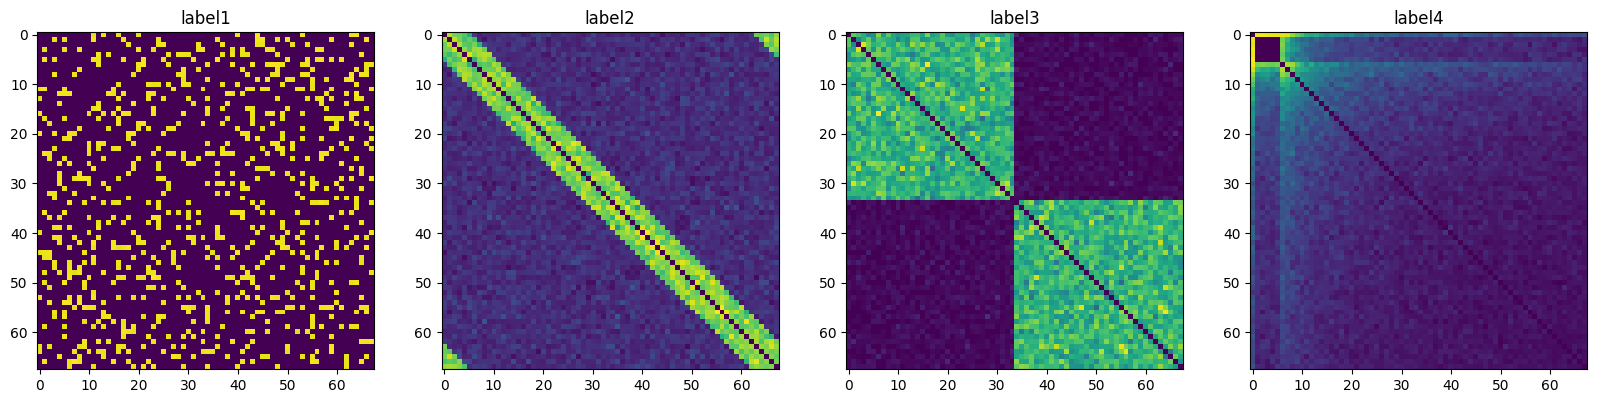

In [5]:
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.imshow(torch.mean(tensor_nets[label == 0].reshape(-1,68,68), axis=0).numpy(),cmap='viridis', origin='upper')
plt.title('label'+str(1))
plt.subplot(1,4,2)
plt.imshow(torch.mean(tensor_nets[label == 1].reshape(-1,68,68), axis=0).numpy(),cmap='viridis', origin='upper')
plt.title('label'+str(2))
plt.subplot(1,4,3)
plt.imshow(torch.mean(tensor_nets[label == 2].reshape(-1,68,68), axis=0).numpy(),cmap='viridis', origin='upper')
plt.title('label'+str(3))
plt.subplot(1,4,4)
plt.imshow(torch.mean(tensor_nets[label == 3].reshape(-1,68,68), axis=0).numpy(),cmap='viridis', origin='upper')
plt.title('label'+str(4))


In [5]:

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

from util.utils import Namespace
config2 = Namespace(n_nodes=68, latent_dim=16*16, hidden_dim=1024, nuisance_dim=4,
    n_enc_layers=1, n_dec_layers=5,n_neighbors=32, drop_out=0.,
    beta = 1., gamma = 0., add_reg = True, y_dim = 1, add_c = True, layernum_gc = 1,              
    lr=3e-6, device=DEVICE,
    autocast_train = True,

    ### ncsnpp
    learning_rate_dae = 1e-4,
    learning_rate_min_dae = 1e-4,
    weight_decay_norm_dae = 1e-2,
    custom_conv_dae = False,
    num_channels_dae = 256,
    num_scales_dae = 3,
    num_cell_per_scale_dae = 8,
    embedding_dim = 128,
    diffusion_steps = 900,
    sigma2_0 = 3e-5,
    beta_start = 0.1,
    beta_end = 20.0,
    vpsde_power = 2,
    sigma2_min = 3e-5,
    sigma2_max = 0.99,
    sde_type = 'geometric_sde',
    train_ode_eps = 1e-2,
    train_ode_solver_tol = 1e-4,
    eval_ode_eps = 1e-5,
    eval_ode_solver_tol = 1e-5,
    time_eps = 1e-2,
    denoising_stddevs = 'beta',
    dropout = 0.,
    fid_dir = '/tmp/nvae-diff/fid-stats',
    mixing_logit_init = -3,
    embedding_type = 'positional',
    embedding_scale = 1.,


    dae_arch = 'ncsnpp', fir = False, progressive = 'none', progressive_input = 'none', progressive_combine = 'sum',

    ### 
    discard_vae_weights = False,
    discard_dae_weights = False,
    train_vae = True,
    iw_sample_p = 'll_uniform',
    iw_sample_q = 'reweight_p_samples',
    iw_subvp_like_vp_sde = False,
    no_autograd_jvp = False,
    apply_sqrt2_res = False,
    drop_inactive_var = False,
    skip_final_eval = False,
    disjoint_training = False,
    update_q_ema = False,
    #####
    ## KL anneal in vada
    cont_kl_anneal = True, kl_anneal_portion_vada = 0.1, kl_const_portion_vada = 0.0, kl_const_coeff_vada = 0.7, kl_max_coeff_vada = 1.0, kl_balance_vada = True,
    ### optimizer
    batch_size = 64, learning_rate_vae = 1e-4, learning_rate_min_vae = 1e-5, ema_decay = 0.9999, 
    weight_decay = 3e-4, weight_decay_norm_vae = 0.0, epochs = 100, warmup_epochs = 5, 
    arch_instance = 'res_mbconv', use_se = False, cont_training = False, grad_clip_max_norm = 0.0

    )
config2.mixed_prediction = True



In [17]:
# model config
###Load data #### 
### this can be skipped
torch.manual_seed(11111)
data = torch.load('data.pt')
##Create the data loader 
tensor_nets = [i[0].view(68,68) for  i in data ]
tensor_nets = torch.stack(tensor_nets,dim = 0)
labels = [i[1] for i in data]
labels = torch.stack(labels)
traits = [i[2] for i in data]
traits = torch.stack(traits)

tensor_nets = tensor_nets.to(torch.float32)
labels = torch.tensor(labels).to(torch.float32)
traits = torch.tensor(traits).to(torch.float32)

data = utils.TensorDataset(tensor_nets, 
                        labels,traits)




C:\Users\YouTianyu\AppData\Local\Temp\ipykernel_24172\870129112.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels).to(torch.float32)
C:\Users\YouTianyu\AppData\Local\Temp\ipykernel_24172\870129112.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  traits = torch.tensor(traits).to(torch.float32)


In [ ]:

torch.save(data,"data.pt")

In [6]:

print(DEVICE)

A_mat_vae = np.mean(tensor_nets.numpy(), axis=0).reshape(68,68)
A_mat_vae = A_mat_vae + A_mat_vae.transpose()
knn_masks_vae = [torch.from_numpy(np.argsort(np.argsort(A_mat_vae, axis=-1), axis=-1) < config2.n_neighbors+i).float().to(config2.device) for i in range(config2.n_dec_layers)]


cuda:0


In [6]:
config = Namespace(n_nodes=68, latent_dim=16*16, hidden_dim=1024, nuisance_dim=1,
    n_enc_layers=1, n_dec_layers=5, n_graph_layer = 3,n_neighbors=32, drop_out=0.,
    beta = 1., gamma = 0., add_reg = True, y_dim = 1, add_c = False, layernum_gc = 1,              
    lr=3e-6, device=DEVICE,
    autocast_train = True,
)


In [9]:

gate_model = CVAE_NEW(config).to(config.device)
gate_model.apply(reset_weights)
gate_model.set_mask(knn_masks_vae)
optimizer = optim.Adam(gate_model.parameters(), lr=config.lr)



In [13]:

vae_model = VAE(config).to(config.device)
vae_model.apply(reset_weights)
optimizer_vae = optim.Adam(vae_model.parameters(), lr=config.lr)

In [10]:

train_losses = []
val_losses = []
for epoch in range(config2.epochs):
    train_loss = gate_model.reg_train(epoch, train_loader, gate_model, optimizer, config.device, n_epoch_display=5)
    val_loss = gate_model.reg_test(epoch, val_loader, gate_model, config.device, n_epoch_display=5)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

train_losses = np.array(train_losses)
val_losses = np.array(val_losses)


epoch: 0 train loss: 5870.565 nll: 5868.196 kl: 1.302  rmse: 0.185
epoch: 0 test loss 5343.921 nll: 5341.634 kl: 1.262  rmse: 0.189
epoch: 5 train loss: 3258.247 nll: 3256.813 kl: 0.669  rmse: 0.157
epoch: 5 test loss 3135.150 nll: 3133.825 kl: 0.596  rmse: 0.160
epoch: 10 train loss: 2571.756 nll: 2570.592 kl: 0.554  rmse: 0.140
epoch: 10 test loss 2531.316 nll: 2530.152 kl: 0.574  rmse: 0.144
epoch: 15 train loss: 2314.933 nll: 2313.589 kl: 0.819  rmse: 0.130
epoch: 15 test loss 2298.738 nll: 2297.396 kl: 0.832  rmse: 0.134
epoch: 20 train loss: 2196.808 nll: 2195.439 kl: 0.902  rmse: 0.122
epoch: 20 test loss 2189.780 nll: 2188.437 kl: 0.888  rmse: 0.127
epoch: 25 train loss: 2135.410 nll: 2134.165 kl: 0.820  rmse: 0.117
epoch: 25 test loss 2132.842 nll: 2131.627 kl: 0.800  rmse: 0.121
epoch: 30 train loss: 2100.550 nll: 2099.433 kl: 0.721  rmse: 0.112
epoch: 30 test loss 2100.269 nll: 2099.181 kl: 0.701  rmse: 0.117
epoch: 35 train loss: 2079.665 nll: 2078.633 kl: 0.658  rmse: 0.11

In [11]:

torch.save(gate_model.state_dict(), 'gate_model_check.pth')


In [14]:
train_losses_vae = []
val_losses_vae = []
for epoch in range(config2.epochs):
    train_loss = vae_model.reg_train(epoch, train_loader, vae_model, optimizer_vae, config.device, n_epoch_display=5)
    val_loss = vae_model.reg_test(epoch, val_loader, vae_model, config.device, n_epoch_display=5)
    train_losses_vae.append(train_loss)
    val_losses_vae.append(val_loss)

train_losses_vae = np.array(train_losses_vae)
val_losses_vae = np.array(val_losses_vae)

epoch: 0 train loss: 5260.021 nll: 5257.807 kl: 1.207  rmse: 0.180
epoch: 0 test loss 4919.711 nll: 4917.676 kl: 1.076  rmse: 0.183
epoch: 5 train loss: 3345.458 nll: 3344.176 kl: 0.571  rmse: 0.151
epoch: 5 test loss 3233.957 nll: 3232.736 kl: 0.542  rmse: 0.155
epoch: 10 train loss: 2680.764 nll: 2679.689 kl: 0.508  rmse: 0.135
epoch: 10 test loss 2636.423 nll: 2635.366 kl: 0.508  rmse: 0.139
epoch: 15 train loss: 2394.157 nll: 2393.145 kl: 0.530  rmse: 0.124
epoch: 15 test loss 2373.965 nll: 2372.970 kl: 0.528  rmse: 0.128
epoch: 20 train loss: 2250.917 nll: 2249.966 kl: 0.530  rmse: 0.117
epoch: 20 test loss 2241.094 nll: 2240.160 kl: 0.524  rmse: 0.120
epoch: 25 train loss: 2172.224 nll: 2171.326 kl: 0.518  rmse: 0.110
epoch: 25 test loss 2167.606 nll: 2166.723 kl: 0.513  rmse: 0.114
epoch: 30 train loss: 2125.857 nll: 2124.979 kl: 0.527  rmse: 0.106
epoch: 30 test loss 2124.008 nll: 2123.142 kl: 0.525  rmse: 0.110
epoch: 35 train loss: 2097.094 nll: 2096.199 kl: 0.570  rmse: 0.10

In [ ]:
torch.save(vae_model.state_dict(), 'vae_model_check.pth')

In [8]:
from score_sde.ncsnpp import NCSNpp


from util import utils
from torch.cuda.amp import autocast,GradScaler
from torch.nn import functional as F
from diffusion_continuous import make_diffusion
from util.sr_utils import SpectralNormCalculator

diffusion = make_diffusion(config2)
def dae_regularization(args, dae_sn_calculator):
    dae_wdn_coeff = args.weight_decay_norm_dae
    dae_norm_loss = dae_sn_calculator.spectral_norm_parallel()
    dae_bn_loss = dae_sn_calculator.batchnorm_loss()
    regularization_p = (dae_norm_loss + dae_bn_loss) * dae_wdn_coeff

    return regularization_p, dae_norm_loss, dae_bn_loss, dae_wdn_coeff


def update_lr(args, global_step, warmup_iters, dae_optimizer, vae_optimizer):
    if global_step < warmup_iters:
        lr = args.learning_rate_dae * float(global_step) / warmup_iters
        for param_group in dae_optimizer.param_groups:
            param_group['lr'] = lr

        if args.train_vae:
            lr = args.learning_rate_vae * float(global_step) / warmup_iters
            for param_group in vae_optimizer.param_groups:
                param_group['lr'] = lr



In [8]:

global_step = 1
n_nodes = 68
grad_scalar = GradScaler(2**10)

dae = NCSNpp(config2,1) .to('cuda')
# create SN calculator
dae_sn_calculator = SpectralNormCalculator(custom_conv= False)   # NCSN++ mode consists of pytorch conv layers
dae_sn_calculator.add_conv_layers(dae)
dae_sn_calculator.add_bn_layers(dae)

vae = CVAE(config2).to('cuda')
vae.apply(reset_weights)
vae.set_mask(knn_masks_vae)

vae_optimizer = optim.Adam(vae.parameters(), config2.lr, eps=1e-3)
dae_optimizer = optim.Adam(dae.parameters(), config2.lr, eps=1e-3)
config2.autocast_train = True
config2.num_total_iter = len(train_loader) * config2.epochs

for epoch in range(0,100):
    dae.train()
    vae.train()
    for step, x in enumerate(train_loader):
        dae_optimizer.zero_grad()
        vae_optimizer.zero_grad()
        with autocast(enabled=config2.autocast_train):
            # apply vae:
            with torch.set_grad_enabled(config2.train_vae):
                x[0] = x[0].to('cuda')
                x[2] = x[2].to('cuda')
                x[1] = x[1].to('cuda')
                logits, y_output,mu, log_var, eps, log_q = vae(x[0],x[1])

                vae_recon_loss = F.poisson_nll_loss(logits, x[0].view(-1, n_nodes*n_nodes), reduction='sum', log_input=False)
                vae_recon_loss_y = F.mse_loss(y_output.view(-1,1), x[2].view(-1,1), reduction='sum')
                vae_recon_loss += vae_recon_loss_y
                vae_neg_entropy = torch.sum(log_q, dim=[1])
                log_q = log_q.view(eps.shape[0],1,16,16)
                eps = eps.view(eps.shape[0],1,16,16)
            kl_T = 0

            noise = torch.randn(size=eps.size(), device='cuda')  # note that this noise value is currently shared!

            # get diffusion quantities for p (sgm prior) sampling scheme and reweighting for q (vae)
            t_p, var_t_p, m_t_p, obj_weight_t_p, obj_weight_t_q, g2_t_p = \
                diffusion.iw_quantities(eps.shape[0], config2.time_eps, config2.iw_sample_p,config2.iw_subvp_like_vp_sde)
            eps_t_p = diffusion.sample_q(eps, noise, var_t_p, m_t_p)

            # in case we want to train q (vae) with another batch using a different sampling scheme for times t
            if config2.iw_sample_q in ['ll_uniform', 'll_iw']:
                t_q, var_t_q, m_t_q, obj_weight_t_q, _, g2_t_q = \
                    diffusion.iw_quantities(eps.shape[0], config2.time_eps, config2.iw_sample_p,config2.iw_subvp_like_vp_sde)
                eps_t_q = diffusion.sample_q(eps, noise, var_t_q, m_t_q)

                eps_t_p = eps_t_p.detach().requires_grad_(True)
                eps_t = torch.cat([eps_t_p, eps_t_q], dim=0)
                var_t = torch.cat([var_t_p, var_t_q], dim=0)
                t = torch.cat([t_p, t_q], dim=0)
                noise = torch.cat([noise, noise], dim=0)
            else:
                eps_t, m_t, var_t, t, g2_t = eps_t_p, m_t_p, var_t_p, t_p, g2_t_p

            # run the score model
            eps_t.requires_grad_(True)
            mixing_component = diffusion.mixing_component(eps_t, var_t, t, enabled=dae.mixed_prediction)
            pred_params = dae(eps_t, t)
            params = utils.get_mixed_prediction(dae.mixed_prediction, pred_params, dae.mixing_logit, mixing_component)
            l2_term = torch.square(params - noise)
            # unpack separate objectives, in case we want to train q (vae) using a different sampling scheme for times t
            if config2.iw_sample_q in ['ll_uniform', 'll_iw']:
                print('ll')
                l2_term_p, l2_term_q = torch.chunk(l2_term, chunks=2, dim=0)
                p_objective = torch.sum(obj_weight_t_p * l2_term_p, dim=[1, 2, 3])
                cross_entropy_per_var = obj_weight_t_q * l2_term_q
            else:
                p_objective = torch.sum(obj_weight_t_p * l2_term, dim=[1, 2, 3])
                cross_entropy_per_var = obj_weight_t_q * l2_term

            cross_entropy_per_var += diffusion.cross_entropy_const(config2.time_eps)
            cross_entropy = torch.sum(cross_entropy_per_var, dim=[1, 2, 3])
            all_neg_log_p = cross_entropy_per_var
            kl_all, kl_vals, kl_diag = utils.kl_call(log_q, all_neg_log_p)

            # kl coefficient
            if config2.cont_kl_anneal:
                kl_coeff = utils.kl_coeff(step=global_step,
                                            total_step=config2.kl_anneal_portion_vada * config2.num_total_iter,
                                            constant_step=config2.kl_const_portion_vada * config2.num_total_iter,
                                            min_kl_coeff= config2.kl_const_coeff_vada,
                                            max_kl_coeff=config2.kl_max_coeff_vada)
            else:
                kl_coeff = 1.0
            
            kl_balanced = kl_coeff*kl_all


            nelbo_loss = kl_balanced + vae_recon_loss ## VAE部分的训练

            regularization_p, dae_norm_loss, dae_bn_loss, dae_wdn_coeff = dae_regularization(config2, dae_sn_calculator)

            # regularization = regularization_p + regularization_q
            q_loss = torch.mean(nelbo_loss) + regularization_p  # vae loss
            p_loss = torch.mean(p_objective) + regularization_p                     # sgm prior loss
            if step % 5 == 0:
                print('kl_coeff:{} epoch:{} step:{} kl:{:.3f} vae_recon_loss:{:.3f} p_loss:{:.3f}'.format(
                kl_coeff,epoch+1, step,torch.mean(kl_balanced), torch.mean(vae_recon_loss), p_loss))
            # if we use different p and q objectives or are not training the vae, discard gradients and backpropagate p_loss
        # backpropagate q_loss for vae and update vae params, if trained
            if config2.train_vae:
                grad_scalar.scale(q_loss).backward(retain_graph=utils.different_p_q_objectives(config2.iw_sample_p, config2.iw_sample_q))
                # utils.average_gradients(vae.parameters(), config2.distributed)
                if config2.grad_clip_max_norm > 0.:  # apply gradient clipping
                    grad_scalar.unscale_(vae_optimizer)
                    torch.nn.utils.clip_grad_norm_(vae.parameters(), max_norm=config2.grad_clip_max_norm)
            grad_scalar.step(vae_optimizer)

            if utils.different_p_q_objectives(config2.iw_sample_p, config2.iw_sample_q) or not config2.train_vae:
                if config2.train_vae:
                    # discard current gradients computed by weighted loss for VAE
                    dae_optimizer.zero_grad()

                # compute gradients with unweighted loss
                grad_scalar.scale(p_loss).backward()
            # update dae parameters
                
            # utils.average_gradients(dae.parameters(), True)
                
            if config2.grad_clip_max_norm > 0.:         # apply gradient clipping
                grad_scalar.unscale_(dae_optimizer)
                torch.nn.utils.clip_grad_norm_(dae.parameters(), max_norm = config2.grad_clip_max_norm)
            grad_scalar.step(dae_optimizer)

            # update grade scalar
            grad_scalar.update()
        #
        global_step += 1


kl_coeff:0.7023076923076923 epoch:1 step:0 kl:31.436 vae_recon_loss:174365.484 p_loss:1363.727
kl_coeff:0.7138461538461538 epoch:1 step:5 kl:27.523 vae_recon_loss:172692.031 p_loss:1359.465
kl_coeff:0.7253846153846153 epoch:1 step:10 kl:24.770 vae_recon_loss:164825.203 p_loss:1356.158
kl_coeff:0.7323076923076923 epoch:2 step:0 kl:3.241 vae_recon_loss:160425.250 p_loss:1328.086
kl_coeff:0.7438461538461538 epoch:2 step:5 kl:16.635 vae_recon_loss:153690.688 p_loss:1344.882
kl_coeff:0.7553846153846153 epoch:2 step:10 kl:29.648 vae_recon_loss:147204.266 p_loss:1361.472
kl_coeff:0.7623076923076922 epoch:3 step:0 kl:0.336 vae_recon_loss:143704.938 p_loss:1322.525
kl_coeff:0.7738461538461539 epoch:3 step:5 kl:26.352 vae_recon_loss:138158.984 p_loss:1352.679
kl_coeff:0.7853846153846153 epoch:3 step:10 kl:28.662 vae_recon_loss:133024.625 p_loss:1362.489
kl_coeff:0.7923076923076923 epoch:4 step:0 kl:4.506 vae_recon_loss:130275.164 p_loss:1330.689
kl_coeff:0.8038461538461539 epoch:4 step:5 kl:7.20

In [9]:

torch.save(vae.state_dict(), 'vae_checkpoint.pth')
# 保存 DAE 模型
torch.save(dae.state_dict(), 'dae_checkpoint.pth')


In [12]:
vae.eval()
dae.eval()  

NCSNpp(
  (act): SiLU()
  (temb_fun): PositionalEmbedding()
  (all_modules): ModuleList(
    (0): Linear(in_features=128, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=512, bias=True)
    (2): Conv2d(1, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ResnetBlockBigGANpp(
      (GroupNorm_0): GroupNorm(32, 256, eps=1e-06, affine=True)
      (Conv_0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (Dense_0): Linear(in_features=512, out_features=256, bias=True)
      (GroupNorm_1): GroupNorm(32, 256, eps=1e-06, affine=True)
      (Dropout_0): Dropout(p=0.0, inplace=False)
      (Conv_1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (act): SiLU()
    )
    (4): AttnBlockpp(
      (GroupNorm_0): GroupNorm(32, 256, eps=1e-06, affine=True)
      (NIN_0): NIN()
      (NIN_1): NIN()
      (NIN_2): NIN()
      (NIN_3): NIN()
    )
    (5): ResnetBlockBigGANpp(
      (GroupNorm_0): GroupNorm(32, 

In [16]:
vae.eval()
dae.eval()

val_logits,val_y,_,_,_,_ = vae(val_set[0][0],val_set[0][1])

In [8]:

vae = CVAE(config2).to(config2.device)

vae.load_state_dict(torch.load('vae_checkpoint.pth'))
vae.eval()


gate_model = CVAE_NEW(config).to(config.device)
# gate_model.set_mask(knn_masks)
gate_model.load_state_dict(torch.load('gate_model_check.pth'))

vae_model = VAE(config).to(config.device)
vae_model.load_state_dict(torch.load('vae_model_check.pth'))


<All keys matched successfully>

In [9]:
num_datas = len(train_loader.dataset)
num_batches = len(train_loader)
print(num_datas,num_batches)

400 13


In [14]:

mu_out_vae = torch.zeros(num_datas, 16*16)
label_out_vae =  torch.zeros(num_datas)
y_vae = torch.zeros(num_datas)
y_vae_out = torch.zeros(num_datas)

vae.eval()
mu_out_gate_model = torch.zeros(num_datas, 16*16)
label_out_gate_model =  torch.zeros(num_datas)
y_gate_model = torch.zeros(num_datas)
y_gate_model_out = torch.zeros(num_datas)


gate_model.eval()
mu_out_vae_model = torch.zeros(num_datas, 16*16)
label_out_vae_model =  torch.zeros(num_datas)
y_vae_model = torch.zeros(num_datas)
y_vae_model_out = torch.zeros(num_datas)

vae_model.eval()

VAE(
  (enc_mu): Linear(in_features=1024, out_features=256, bias=True)
  (enc_logvar): Linear(in_features=1024, out_features=256, bias=True)
  (enc_drop): Dropout(p=0.0, inplace=False)
  (encoder): Sequential(
    (0): Linear(in_features=4625, out_features=1024, bias=True)
  )
  (encoder_no_c): Sequential(
    (0): Linear(in_features=4624, out_features=1024, bias=True)
  )
  (dec_layers): ParameterList(
      (0): Object of type: Linear
      (1): Object of type: Linear
      (2): Object of type: Linear
      (3): Object of type: Linear
      (4): Object of type: Linear
    (0): Linear(in_features=257, out_features=68, bias=True)
    (1): Linear(in_features=257, out_features=68, bias=True)
    (2): Linear(in_features=257, out_features=68, bias=True)
    (3): Linear(in_features=257, out_features=68, bias=True)
    (4): Linear(in_features=257, out_features=68, bias=True)
  )
  (dec_layers_no_c): ParameterList(
      (0): Object of type: Linear
      (1): Object of type: Linear
      (2):

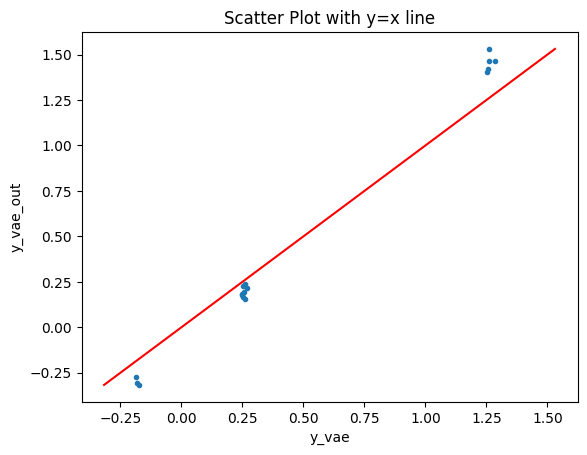

In [28]:

for i, data in enumerate(train_loader):
    start = i*32
    end = start + len(data[0])
    if i == num_batches - 1:
        end = num_datas
    data[0] = data[0].to('cuda')
    data[1] = data[1].to('cuda')
    recon_batch, y,mu, logvar,_,_ = vae(data[0],data[1])
    mu_out_vae[start:end] = mu
    label_out_vae[start:end] = data[1]
    y_vae = y
    y_vae_out = data[2].to('cpu')


# 绘制散点图
plt.scatter(y_vae.detach().to('cpu'), y_vae_out, marker='.')

# 添加y=x的直线
plt.plot([min(y_vae.detach().to('cpu').min(), y_vae_out.min()), max(y_vae.detach().to('cpu').max(), y_vae_out.max())],
         [min(y_vae.detach().to('cpu').min(), y_vae_out.min()), max(y_vae.detach().to('cpu').max(), y_vae_out.max())], color='red')

plt.xlabel('y_vae')
plt.ylabel('y_vae_out')
plt.title('Scatter Plot with y=x line')
plt.show()


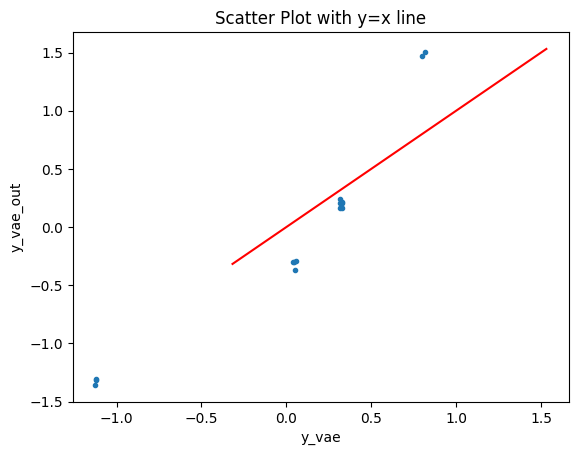

In [29]:

for i, data in enumerate(train_loader):
    start = i*32
    end = start + len(data[0])
    if i == num_batches - 1:
        end = num_datas
    data[0] = data[0].to('cuda')
    data[1] = data[1].to('cuda')
    recon_batch, y,mu, logvar,_,_ = gate_model(data[0],data[1])
    mu_out_gate_model[start:end] = mu
    label_out_gate_model[start:end] = data[1]
    y_gate_model = y
    y_gate_model_out = data[2].to('cpu')

# 绘制散点图
plt.scatter(y_gate_model.detach().to('cpu'), y_gate_model_out, marker='.')

# 添加y=x的直线
plt.plot([min(y_vae.detach().to('cpu').min(), y_vae_out.min()), max(y_vae.detach().to('cpu').max(), y_vae_out.max())],
         [min(y_vae.detach().to('cpu').min(), y_vae_out.min()), max(y_vae.detach().to('cpu').max(), y_vae_out.max())], color='red')

plt.xlabel('y_vae')
plt.ylabel('y_vae_out')
plt.title('Scatter Plot with y=x line')
plt.show()

In [20]:


for i, data in enumerate(train_loader):
    start = i*32
    end = start + len(data[0])
    if i == num_batches - 1:
        end = num_datas
    data[0] = data[0].to('cuda')
    data[1] = data[1].to('cuda')
    recon_batch, y,mu, logvar,_,_ = vae_model(data[0],data[1])
    mu_out_vae_model[start:end] = mu
    label_out_vae_model[start:end] = data[1]

In [1]:

# Assuming label_out_vae is defined somewhere before

X_vae = mu_out_vae.detach().numpy()
pca_vae = PCA(n_components=3)
pca_vae.fit(X_vae.transpose())
pca_results = pca_vae.components_.transpose()
fig = plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=label_out_vae.numpy().astype(int), alpha=0.8)
plt.title('(a)')
plt.ylim(-0.1, 0.1)

X_gate = mu_out_gate_model.detach().numpy()
pca_gate = PCA(n_components=3)
pca_gate.fit(X_gate.transpose())
pca_results = pca_gate.components_.transpose()

plt.subplot(1, 3, 2)
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=label_out_gate_model.numpy().astype(int), alpha=0.8)
plt.title('(b)')
plt.ylim(-0.1, 0.1)

X_vae_model = mu_out_vae_model.detach().numpy()
pca_vae_model = PCA(n_components=3)
pca_vae_model.fit(X_vae_model.transpose())
pca_results = pca_vae_model.components_.transpose()

plt.subplot(1, 3, 3)
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=label_out_vae_model.numpy().astype(int), alpha=0.8)
plt.title('(c)')
plt.ylim(-0.1, 0.1)

plt.savefig('results/pca_all.png')
plt.show()


NameError: name 'mu_out_vae' is not defined

In [44]:
from torch.nn import functional as F
recon_loss = 0
mse = 0
yhats = []
ys = []
for i, data in enumerate(val_loader):
    data[0] = data[0].to('cuda')
    data[1] = data[1].to('cuda')
    recon_batch, y,mu, logvar,_,_ = vae(data[0],data[1])
    y = y.to('cpu')
    ys.append(data[2].reshape(1,-1))
    yhats.append(y.reshape(1,-1))

    recon_loss += F.mse_loss(recon_batch,data[0],reduction='sum')
    mse += F.mse_loss(y.reshape(-1,),data[2].reshape(-1,),reduction='sum')

ys = torch.hstack(ys)
yhats = torch.hstack(yhats)
print(recon_loss/(100*68*68))
mse/100

tensor(1.7220, device='cuda:0', grad_fn=<DivBackward0>)


tensor(0.0155, grad_fn=<DivBackward0>)

In [45]:
mse_gate = 0
recon_loss_gate=0
yhats_gate = []
ys_gate = []
for i, data in enumerate(val_loader):
    data[0] = data[0].to('cuda')
    data[1] = data[1].to('cuda')
    recon_batch, y,mu, logvar,_,_ = gate_model(data[0],data[1])
    y = y.to('cpu')
    ys_gate.append(data[2].reshape(1,-1))
    yhats_gate.append(y.reshape(1,-1))
    recon_loss_gate += F.mse_loss(recon_batch,data[0],reduction='sum')
    mse_gate += F.mse_loss(y.reshape(-1,),data[2].reshape(-1,),reduction='sum')
ys_gate = torch.hstack(ys_gate)
yhats_gate = torch.hstack(yhats_gate)
print(recon_loss_gate/(100*68*68))
mse_gate/100


tensor(1.4121, device='cuda:0', grad_fn=<DivBackward0>)


tensor(0.1523, grad_fn=<DivBackward0>)

In [26]:
mse_vae = 0
recon_loss_vae = 0
yhats_vae = []
ys_vae = []
for i, data in enumerate(val_loader):
    data[0] = data[0].to('cuda')
    data[1] = data[1].to('cuda')
    recon_batch, y,mu, logvar,_,_ = vae_model(data[0],data[1])
    y = y.to('cpu')
    ys_vae.append(data[2].reshape(1,-1))
    yhats_vae.append(y.reshape(1,-1))
    recon_loss_vae += F.mse_loss(recon_batch,data[0],reduction='sum')
    mse_vae += F.mse_loss(y.reshape(-1,),data[2].reshape(-1,),reduction='sum')

ys_vae = torch.hstack(ys_vae)
yhats_vae = torch.hstack(yhats_vae)
print(recon_loss_vae/(100*68*68))
mse_vae/100

tensor(1.9821, device='cuda:0', grad_fn=<DivBackward0>)


tensor(0.1750, grad_fn=<DivBackward0>)